# About
The notebook explains agglomerative hierarchical clustering algorithm through scipy implementation.

In [175]:
# import modules

import numpy as np
import pandas as pd
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import dendrogram, linkage
import scipy.stats
from scipy.spatial import distance, distance_matrix

In [135]:
# prepare dataset
data = pd.DataFrame({'F1': [1,1,0,0,1,0,0],
                   'F2': [1,1,1,0,1,1,1],
                   'F3': [1,0,1,0,1,0,1],
                   'F4': [0,1,0,1,0,1,0],
                   'F5': [1,1,1,0,1,1,1],
                   'F6': [0,0,0,1,0,0,1],
                   'F7': [0,0,0,0,1,0,0],
                   'F8': [1,0,1,0,1,0,1],
                   'F9': [1,0,0,0,1,0,1],
                   'F10': [1,1,0,0,0,1,0]
                  }, index=list('ABCDEFG'))

# Functions

### Function: Calculate linkage

In [139]:
def clust_linkage(c1, c2, dist='euclidean', linkage='max'):
    dist1 = []
    dist2 = []
    for i in c1:
        dist1 = []
        for j in c2:
            dist1.append(eval('distance.'+dist+'(i,j)'))
        dist2.append(np.max(dist1))
    return eval('np.'+linkage+'(dist2)')    

### Function: clust_dist(c1,c2)
Calculated maximum(complete) linkage between two clusters c1 and c2 of any size. 

In [140]:
def clust_dist(c1,c2, dist='euclidean', linkage='max'):
    if len(c1) == 1 and len(c2) == 1:
        return eval('distance.'+dist+'(c1[0], c2[0])')
    elif len(c1) > 1 or len(c2) > 1:
        dist1 = []
        dist2 = []
        for i in c1:
            dist1 = []
            for j in c2:
                dist1.append(eval('distance.'+dist+'(i,j)'))
            dist2.append(eval('np.'+linkage+'(dist1)'))
        return eval('np.'+linkage+'(dist2)')

### Function: dist_matrix(cluster_group)
Returns distance matrix between singleton and merged clusters.

In [142]:
def dist_matrix(cluster_group, dist='euclidean', linkage='max'):
    p_clust_dist = []
    labels = []
    
    for i in np.arange(len(cluster_group) - 1):
        for j in np.arange(i+1, len(cluster_group)):
            c1 = data.loc[cluster_group[i]].values
            c2 = data.loc[cluster_group[j]].values
            p_clust_dist.append(clust_dist(c1,c2, dist, linkage=linkage))
        
    for item in cluster_group:
        labels.append(''.join(item)) 
    
    return pd.DataFrame(squareform(p_clust_dist), columns=labels, index=labels)

## Iteration 1
At the beginning all data points is considered as a singleton cluster and subsequently with each iteration sigleton and merged clusters gets merged until all data points gets merged with some clusters.

In [176]:
cluster_group1 = [['A'], ['B'], ['C'], ['D'], ['E'], ['F'], ['G']]

In [177]:
dist_matrix(cluster_group1, dist='euclidean', linkage='max')

,A,B,C,D,E,F,G
A,0.000000,2.000000,1.732051,3.000000,1.414214,2.236068,1.732051
B,2.000000,0.000000,2.236068,2.236068,2.449490,1.000000,2.645751
C,1.732051,2.236068,0.000000,2.449490,1.732051,2.000000,1.414214
D,3.000000,2.236068,2.449490,0.000000,3.000000,2.000000,2.449490
E,1.414214,2.449490,1.732051,3.000000,0.000000,2.645751,1.732051
F,2.236068,1.000000,2.000000,2.000000,2.645751,0.000000,2.449490
G,1.732051,2.645751,1.414214,2.449490,1.732051,2.449490,0.000000


## Iteration 2
[B, F] will be merged as per above disimilarity matrix. 

In [145]:
cluster_group2 = [['A'], ['B', 'F'], ['C'], ['D'], ['E'], ['G']]

In [146]:
dist_matrix(cluster_group2, dist='euclidean', linkage='max')

,A,BF,C,D,E,G
A,0.000000,2.236068,1.732051,3.000000,1.414214,1.732051
BF,2.236068,0.000000,2.236068,2.236068,2.645751,2.645751
C,1.732051,2.236068,0.000000,2.449490,1.732051,1.414214
D,3.000000,2.236068,2.449490,0.000000,3.000000,2.449490
E,1.414214,2.645751,1.732051,3.000000,0.000000,1.732051
G,1.732051,2.645751,1.414214,2.449490,1.732051,0.000000


## Iteration 3
Next [A,E] will be merged as it has the minimum euclidean distance (maximum similarity)

In [178]:
cluster_group3 = [['A', 'E'], ['B', 'F'], ['C'], ['D'], ['G']]

In [179]:
dist_matrix(cluster_group3)

,AE,BF,C,D,G
AE,0.000000,2.645751,1.732051,3.000000,1.732051
BF,2.645751,0.000000,2.236068,2.236068,2.645751
C,1.732051,2.236068,0.000000,2.449490,1.414214
D,3.000000,2.236068,2.449490,0.000000,2.449490
G,1.732051,2.645751,1.414214,2.449490,0.000000


## Iteration 4

In [180]:
cluster_group4 = [['A', 'E'], ['B', 'F'], ['C', 'G'], ['D']]

In [181]:
dist_matrix(cluster_group4)

,AE,BF,CG,D
AE,0.000000,2.645751,1.732051,3.000000
BF,2.645751,0.000000,2.645751,2.236068
CG,1.732051,2.645751,0.000000,2.449490
D,3.000000,2.236068,2.449490,0.000000


## Iteration 5

In [182]:
cluster_group5 = [['A', 'E', 'C', 'G'], ['B', 'F'], ['D']]

In [183]:
dist_matrix(cluster_group5)

,AECG,BF,D
AECG,0.000000,2.645751,3.000000
BF,2.645751,0.000000,2.236068
D,3.000000,2.236068,0.000000


## Iteration 6

In [184]:
cluster_group6 = [['A', 'E', 'C', 'G'], ['B', 'F','D']]

In [185]:
dist_matrix(cluster_group6)

,AECG,BFD
AECG,0.0,3.0
BFD,3.0,0.0


## Use linkage for hierarchical clustering

In [186]:
linkage_matrix = linkage(data.values, method='complete', metric='euclidean')

In [187]:
data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
A,1,1,1,0,1,0,0,1,1,1
B,1,1,0,1,1,0,0,0,0,1
C,0,1,1,0,1,0,0,1,0,0
D,0,0,0,1,0,1,0,0,0,0
E,1,1,1,0,1,0,1,1,1,0
F,0,1,0,1,1,0,0,0,0,1
G,0,1,1,0,1,1,0,1,1,0


In [188]:
# refer sicpy doc or some blog about how to interpret below. 
linkage_matrix

array([[ 1.        ,  5.        ,  1.        ,  2.        ],
       [ 0.        ,  4.        ,  1.41421356,  2.        ],
       [ 2.        ,  6.        ,  1.41421356,  2.        ],
       [ 8.        ,  9.        ,  1.73205081,  4.        ],
       [ 3.        ,  7.        ,  2.23606798,  3.        ],
       [10.        , 11.        ,  3.        ,  7.        ]])

In [191]:
# to understand above output, create distance matrix along with all newly merged clusters
# match row numbers with above output and verify values.

cluster_groups = [['A'], ['B'], ['C'], ['D'], ['E'], ['F'], ['G'], ['B', 'F'], ['A', 'E'], ['C', 'G'], 
                      ['A', 'E','C', 'G'], ['A', 'E','C', 'G', 'B', 'F'], ['A', 'E','C', 'G', 'B', 'F', 'D']]

In [190]:
dist_matrix(cluster_groups)

,A,B,C,D,E,F,G,BF,AE,CG,AECG,AECGBF,AECGBFD
A,0.000000,2.000000,1.732051,3.000000,1.414214,2.236068,1.732051,2.236068,1.414214,1.732051,1.732051,2.236068,3.000000
B,2.000000,0.000000,2.236068,2.236068,2.449490,1.000000,2.645751,1.000000,2.449490,2.645751,2.645751,2.645751,2.645751
C,1.732051,2.236068,0.000000,2.449490,1.732051,2.000000,1.414214,2.236068,1.732051,1.414214,1.732051,2.236068,2.449490
D,3.000000,2.236068,2.449490,0.000000,3.000000,2.000000,2.449490,2.236068,3.000000,2.449490,3.000000,3.000000,3.000000
E,1.414214,2.449490,1.732051,3.000000,0.000000,2.645751,1.732051,2.645751,1.414214,1.732051,1.732051,2.645751,3.000000
F,2.236068,1.000000,2.000000,2.000000,2.645751,0.000000,2.449490,1.000000,2.645751,2.449490,2.645751,2.645751,2.645751
G,1.732051,2.645751,1.414214,2.449490,1.732051,2.449490,0.000000,2.645751,1.732051,1.414214,1.732051,2.645751,2.645751
BF,2.236068,1.000000,2.236068,2.236068,2.645751,1.000000,2.645751,0.000000,2.645751,2.645751,2.645751,2.645751,2.645751
AE,1.414214,2.449490,1.732051,3.000000,1.414214,2.645751,1.732051,2.645751,0.000000,1.732051,1.732051,2.645751,3.000000
CG,1.732051,2.645751,1.414214,2.449490,1.732051,2.449490,1.414214,2.645751,1.732051,0.000000,1.732051,2.645751,2.645751


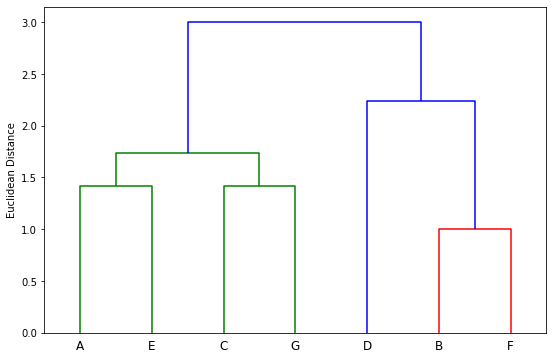

In [192]:
# plot dendrogram

import matplotlib.pyplot as plt
plt.figure(figsize=(9,6));
plt.tight_layout()
plt.ylabel('Euclidean Distance')
dend = dendrogram(linkage_matrix, labels=labels)

## Agglomerative Clustering in sklearn
Scikit learn does the same, we just have to provide n_clusters. You can cut the above dendograms for get desired number of clusters and verify the cluster assignments with scikit learn's output. 

In [164]:
from sklearn.cluster import AgglomerativeClustering

In [170]:
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')

In [171]:
ac.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='complete', memory=None, n_clusters=3)

In [172]:
ac.labels_

array([0, 1, 0, 2, 0, 1, 0])

In [173]:
data_clustered = pd.DataFrame({'Data Points': data.index, 'Assigned Cluster': ac.labels_})

In [193]:
# it is evident from below output that cluster assignment is in line with scipy's dendrogram output if choose
# to cut it in order to get 3 clusters.

data_clustered.sort_values(by='Assigned Cluster')

,Data Points,Assigned Cluster
0,A,0
2,C,0
4,E,0
6,G,0
1,B,1
5,F,1
3,D,2
